## Импорт

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns

In [42]:
sns.set(rc={'figure.figsize':(5,5)})

## Чтение данных и их изучение

In [66]:
df = pd.read_excel('result_df.xlsx', index_col=0)

In [24]:
df.head()

,user_id,funnel_stage,timestamp,profit,os,ad_channel,price
0,666743,interest,150000,NaN,Android,banner,0.50
1563367,1035593,interest,150000,NaN,Android,partner_network,1.00
1563366,800792,interest,150000,NaN,Android,partner_network,1.00
1563365,561010,interest,150000,NaN,iOS,partner_network,1.00
2025238,833649,interest,150000,NaN,Android,video,0.75


In [67]:
df['os'] = df['os'].apply(lambda x: 1 if x == 'Android' else 0)
df['os']

0          1
1563367    1
1563366    1
1563365    0
2025238    1
          ..
2025236    1
1542030    1
1542031    0
1542032    1
1542033    0
Name: os, Length: 600889, dtype: int64

In [26]:
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder, MinMaxScaler

In [68]:
# Используем метод factorize для кодирования колонки 'category'
labels, uniques = pd.factorize(df['funnel_stage'])

# Создаем новую колонку 'category_label' в датафрейме и присваиваем ей метки
df['funnel_stage'] = labels

# Выводим результат
df.head()

,user_id,funnel_stage,timestamp,profit,os,ad_channel,price
0,666743,0,150000,NaN,1,banner,0.50
1563367,1035593,0,150000,NaN,1,partner_network,1.00
1563366,800792,0,150000,NaN,1,partner_network,1.00
1563365,561010,0,150000,NaN,0,partner_network,1.00
2025238,833649,0,150000,NaN,1,video,0.75


In [14]:
le = LabelEncoder()
#cols_to_le = 'funnel_stage'
df['funnel_stage'] = le.fit_transform(df['funnel_stage'])
df


,Unnamed: 0,user_id,funnel_stage,timestamp,profit,os,ad_channel,price
0,0,666743,6,150000,NaN,1,banner,0.50
1,1563367,1035593,6,150000,NaN,1,partner_network,1.00
2,1563366,800792,6,150000,NaN,1,partner_network,1.00
3,1563365,561010,6,150000,NaN,0,partner_network,1.00
4,2025238,833649,6,150000,NaN,1,video,0.75
...,...,...,...,...,...,...,...,...
600884,2025236,789473,7,201912,2136.0,1,partner_network,1.00
600885,1542030,1036500,7,202012,50.0,1,organic_traffic,0.00
600886,1542031,539693,7,202053,50.0,0,organic_traffic,0.00
600887,1542032,583326,7,202140,1099.0,1,organic_traffic,0.00


## Подсчет корреляции c Pandas и ее визуализация

In [38]:
cols = ['user_id', 'funnel_stage', 'timestamp',  'os', 'price']
df[cols].corr()

,user_id,funnel_stage,timestamp,os,price
user_id,1.000000,0.000705,-0.002598,-0.046020,-0.000860
funnel_stage,0.000705,1.000000,0.018012,-0.015672,0.040314
timestamp,-0.002598,0.018012,1.000000,-0.000608,-0.000647
os,-0.046020,-0.015672,-0.000608,1.000000,-0.171996
price,-0.000860,0.040314,-0.000647,-0.171996,1.000000


<Axes: >

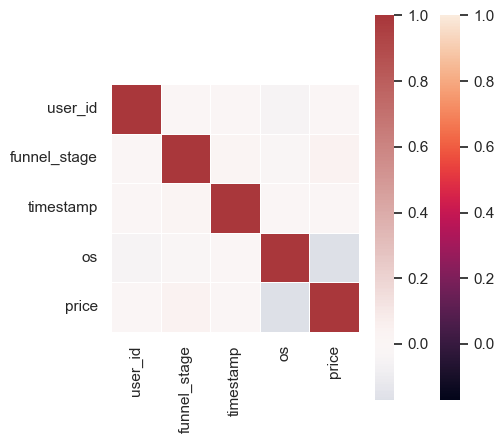

In [44]:
sns.heatmap(df[cols].corr(), cmap='vlag', center=0, square=True, linewidths=.5)

In [49]:
cols = ['user_id', 'price']
df[cols].corr()

,user_id,price
user_id,1.00000,-0.00086
price,-0.00086,1.00000


In [69]:
df_cp = df

In [70]:
# Используем метод factorize для кодирования колонки 'user_id'
labels_user_id, uniques_user_id = pd.factorize(df_cp['user_id'])
df_cp['user_id'] = labels_user_id

# Используем метод factorize для кодирования колонки 'price'
labels_price, uniques_price = pd.factorize(df_cp['price'])
df_cp['price'] = labels_price

# Выводим результат
df_cp.head()

,user_id,funnel_stage,timestamp,profit,os,ad_channel,price
0,0,0,150000,NaN,1,banner,0
1563367,1,0,150000,NaN,1,partner_network,1
1563366,2,0,150000,NaN,1,partner_network,1
1563365,3,0,150000,NaN,0,partner_network,1
2025238,4,0,150000,NaN,1,video,2


In [71]:
alpha = 0.95 # уровень значимости

In [72]:
res = st.pearsonr(df_cp['user_id'], df_cp['price'], alternative='two-sided')

In [73]:
print(res.correlation, res.pvalue)

0.057393548744308395 0.0


In [74]:
left_side_occurance = res.pvalue < (1 - alpha)/2
right_side_occurance = (1 - alpha)/2 + alpha < res.pvalue
critical_region_occurance = left_side_occurance or right_side_occurance
critical_region_occurance

True

In [75]:
res.confidence_interval(confidence_level=alpha)

ConfidenceInterval(low=0.054873080590738435, high=0.059913285485353004)

In [78]:
le = LabelEncoder()
#cols_to_le = 'funnel_stage'
df['ad_channel'] = le.fit_transform(df['ad_channel'])
df.head()

,user_id,funnel_stage,timestamp,profit,os,ad_channel,price
0,0,0,150000,0.0,1,0,0
1563367,1,0,150000,0.0,1,4,1
1563366,2,0,150000,0.0,1,4,1
1563365,3,0,150000,0.0,0,4,1
2025238,4,0,150000,0.0,1,6,2


In [76]:
df['profit'].fillna(0, inplace=True)

## Факторный анализ

In [80]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo
from factor_analyzer import FactorAnalyzer

In [81]:
from sklearn.preprocessing import StandardScaler

In [87]:
сolumns = ['user_id', 'funnel_stage', 'timestamp', 'profit', 'os', 'ad_channel', 'price']

In [89]:

# Цикл для применения factorize к каждой колонке
for col in сolumns:
    labels, uniques = pd.factorize(df[col])
    df[col] = labels

df

,user_id,funnel_stage,timestamp,profit,os,ad_channel,price
0,0,0,0,0,0,0,0
1563367,1,0,0,0,0,1,1
1563366,2,0,0,0,0,1,1
1563365,3,0,0,0,1,1,1
2025238,4,0,0,0,0,2,2
...,...,...,...,...,...,...,...
2025236,346027,6,50913,4,0,1,1
1542030,346247,6,50914,5,0,4,4
1542031,346517,6,50915,5,1,4,4
1542032,345711,6,50916,3,0,4,4


In [97]:
import scipy.stats as stats
test_result = stats.bartlett(df['user_id'], df['funnel_stage'], df['timestamp'], df['profit'], df['os'], df['ad_channel'], df['price'])

# Выводим результаты
print("Статистика теста Барлетта:", test_result.statistic)
print("p-значение теста Барлетта:", test_result.pvalue)

Статистика теста Барлетта: 64476502.24406871
p-значение теста Барлетта: 0.0


In [99]:
sc = StandardScaler()

In [100]:
df = sc.fit_transform(df)

In [118]:
fa = FactorAnalyzer(n_factors=4)

In [119]:
fa.fit(df)

FactorAnalyzer(n_factors=4, rotation_kwargs={})

In [120]:
ev, v = fa.get_eigenvalues()

<Axes: >

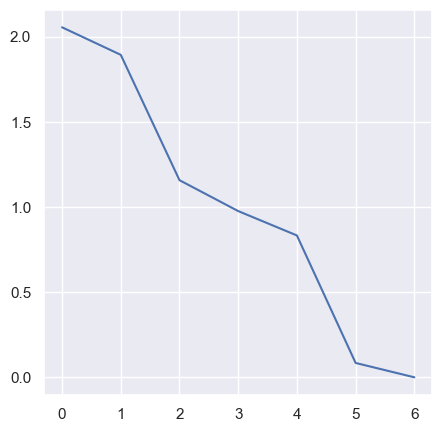

In [121]:
sns.lineplot(data=ev)

In [122]:
n_factors = 3

In [123]:
fa = FactorAnalyzer(n_factors=n_factors)

In [124]:
fa.fit(df)

FactorAnalyzer(rotation_kwargs={})

In [125]:
loadings = pd.DataFrame(fa.loadings_, index=X.columns, columns=['factor_{x}'.format(x=x+1) for x in range(n_factors)])

In [126]:
loadings.sort_values(by='factor_1', ascending=False)

,factor_1,factor_2,factor_3
ad_channel,1.000855,0.020656,-0.038811
price,1.000855,0.020656,-0.038811
os,0.110314,-0.004896,0.008849
funnel_stage,0.045663,0.009038,0.577825
user_id,0.027934,0.996480,-0.025830
profit,-0.021529,-0.002857,0.281147
timestamp,-0.026837,0.918054,0.028288


In [127]:
loadings.sort_values(by='factor_2', ascending=False)

,factor_1,factor_2,factor_3
user_id,0.027934,0.996480,-0.025830
timestamp,-0.026837,0.918054,0.028288
ad_channel,1.000855,0.020656,-0.038811
price,1.000855,0.020656,-0.038811
funnel_stage,0.045663,0.009038,0.577825
profit,-0.021529,-0.002857,0.281147
os,0.110314,-0.004896,0.008849


In [128]:
loadings.sort_values(by='factor_3', ascending=False)

,factor_1,factor_2,factor_3
funnel_stage,0.045663,0.009038,0.577825
profit,-0.021529,-0.002857,0.281147
timestamp,-0.026837,0.918054,0.028288
os,0.110314,-0.004896,0.008849
user_id,0.027934,0.996480,-0.025830
ad_channel,1.000855,0.020656,-0.038811
price,1.000855,0.020656,-0.038811


In [129]:
df_tr = pd.DataFrame(fa.transform(df))

In [131]:
df_tr = pd.DataFrame(fa.transform(df))
df_tr

,0,1,2
0,-1.210616,-1.667729,-0.459882
1,-0.609372,-1.683900,-0.449470
2,-0.609373,-1.683890,-0.449472
3,-0.609056,-1.671029,-0.437914
4,-0.008129,-1.700051,-0.439061
...,...,...,...
600884,-0.463202,1.904486,5.296364
600885,1.373459,1.879376,6.212903
600886,1.373693,1.894835,6.223931
600887,1.307634,1.831594,4.442562
